### 이미지 데이터 수집 후 저장
- 이미지를 수집한 후 저장하는 실습
- 폴더 생성하는 작업 또한 자동화

In [1]:
from selenium import webdriver as wb
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import pandas as pd
import time
from tqdm import tqdm
import matplotlib.pyplot as plt

# 이미지 저장을 위한 라이브러리
# 수집 (src 정보를 수집 > 컴퓨터에 이미지로 저장해주는 라이브러리)
from urllib.request import urlretrieve
# 파일이나 폴더를 생성해주는 라이브러리 (파일 시스템 라이브러리)
import os # Operating System

- 폴더 생성하기(자동화)

In [2]:
# 폴더 생성하기
# os.mkdir("경로\\폴더이름")
os.mkdir("C:\\Users\\smhrd\\Desktop\\포켓몬도감")
# 이미 존재하는 폴더이름일 경우에는 오류가 발생
# 조건을 주어 오류를 발생하지 않도록 실행

FileExistsError: [WinError 183] 파일이 이미 있으므로 만들 수 없습니다: 'C:\\Users\\smhrd\\Desktop\\포켓몬도감'

In [3]:
# 만약에 폴더명이 없다면 생성해주고
if not os.path.isdir("C:\\Users\\smhrd\\Desktop\\포켓몬도감") :
    print("폴더생성")
    
    # 주의사항! 경로는 본인 컴퓨터의 경로로 변경!!
    os.mkdir("C:\\Users\\smhrd\\Desktop\\포켓몬도감")



# 그렇지 않으면 (폴더명이 있음) 이미 존재하는 폴더입니다 라고 출력
else:
    print("이미 존재하는 폴더입니다")

이미 존재하는 폴더입니다


In [24]:
# 포켓몬 페이지 불러오기
driver = wb.Chrome()
driver.get('https://www.pokemonkorea.co.kr/pokedex#pokedex_1')

In [21]:
# 이미지데이터 수집
# 모든 이미지데이터 수집 img 변수에 담기
img = driver.find_elements(By.CLASS_NAME, 'img-fluid')
img[0].text
# img 태그는 홀태그 (콘테츠를 갖고 있지 않음)
# .text 속성은 여는 태그와 닫는 태그 사이에 있는 콘텐츠 추출

''

In [22]:
len(img)

216

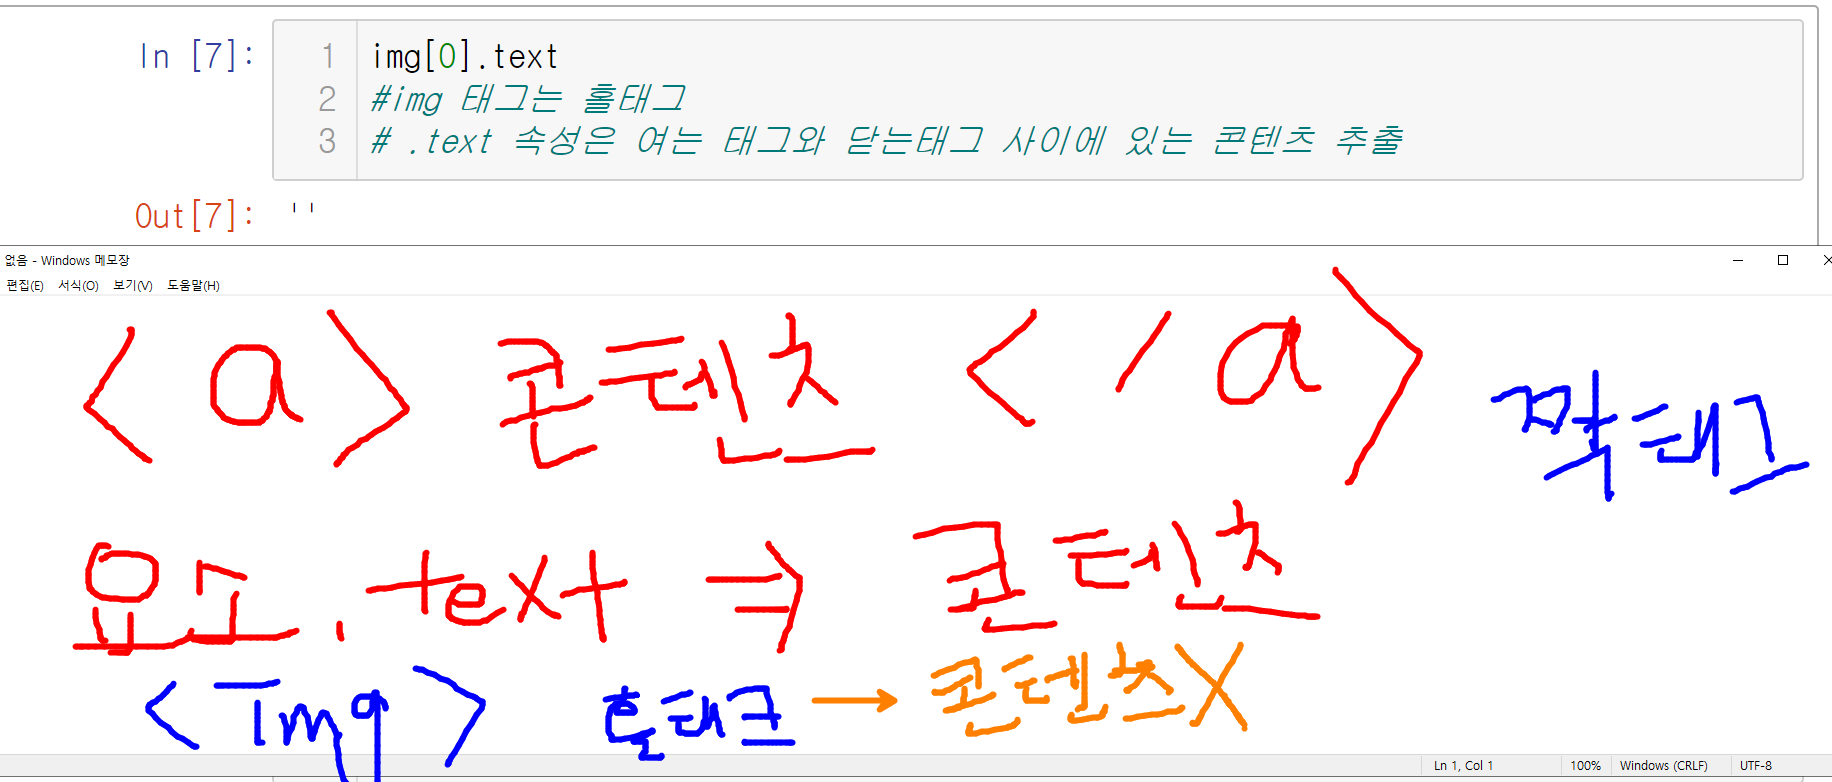

In [7]:
# img 태그에서 콘텐츠가 아닌 속성을 추출하는 방법
# 요소.get_attribute()
img[0].get_attribute('src')
# 출력된 정보 :  이미지의 주소(경로)


'https://data1.pokemonkorea.co.kr/newdata/pokedex/mid/000101.png'

In [8]:
# 이미지 파일의 경로(src)를 활용하여 이미지 파일로 저장
# urlretrieve(이미지의 경로, '저장할 위치\\파일명.확장자')

urlretrieve(img[0].get_attribute('src'), 'C:\\Users\\smhrd\\Desktop\\포켓몬도감\\포켓몬.jpg')

('C:\\Users\\smhrd\\Desktop\\포켓몬도감\\포켓몬.jpg',
 <http.client.HTTPMessage at 0x1f8bf803750>)

In [9]:
driver.get('https://www.pokemonkorea.co.kr/pokedex?word=%EC%95%88%EB%86%8D&characters=&area=&snumber=1&snumber2=1025&sortselval=number+asc%2Cnumber_count+asc&typetextcs=_________________')

In [10]:
hello = driver.find_element(By.CLASS_NAME,'img-fluid')

In [12]:
hello.get_attribute('src')

'https://data1.pokemonkorea.co.kr/newdata/pokedex/mid/020101.png'

In [14]:
urlretrieve(hello.get_attribute('src'), 'C:\\Users\\smhrd\\Desktop\\포켓몬도감\\안농.jpg')

('C:\\Users\\smhrd\\Desktop\\포켓몬도감\\안농.jpg',
 <http.client.HTTPMessage at 0x1f8bf851f90>)

In [ ]:
# 반복문을 사용해서 여러 마리의 포켓몬 저장


In [ ]:
for i in range(len(img)) :
    urlretrieve(img[i].get_attribute('src'), 'C:\\Users\\smhrd\\Desktop\\포켓몬도감\\포켓몬.jpg')
# 파일명이 같으면 덮어쓰기가 된다!

In [23]:
for i in range(len(img)) :
    urlretrieve(img[i].get_attribute('src'), f'C:\\Users\\smhrd\\Desktop\\포켓몬도감\\포켓몬{i+1}.jpg')

### 화면 스크롤을 통해 더 많은 포켓몬 이미지 수집

In [35]:
# 화면 스크롤 하는 방법 !! (키보드 END 키 활용)
# 페이지 전체를 담당하는 body 태그에ㅐ게 end 키 보내주기
body = driver.find_element(By.CSS_SELECTOR, 'body')
body.send_keys(Keys.END)

In [37]:
for i in tqdm(range(20)) : 
    body = driver.find_element(By.CSS_SELECTOR, 'body')
    body.send_keys(Keys.END)    
    time.sleep(1)

100%|██████████| 20/20 [00:20<00:00,  1.04s/it]


### 코드 합치기

In [ ]:
# 라이브러리 불러오기
from selenium import webdriver as wb # 통제,제어
from selenium.webdriver.common.keys import Keys # 입력, 컴퓨터용 키보드
from selenium.webdriver.common.by import By # 구분
import pandas as pd
import time # 쉬는시간
from tqdm import tqdm # 반복상황 로딩바로 출력
from urllib.request import urlretrieve  
import os

# 만약에 폴더명일 없다면 생성해주고
if not os.path.isdir("C:\\Users\\smhrd\\Desktop\\포켓몬도감"):
    print("폴더생성")
    #폴더를 생성하는 코드를 작성
    os.mkdir("C:\\Users\\smhrd\\Desktop\\포켓몬도감")
    
# 그렇지 않으면(폴더명이 있음) "이미 존재하는 폴더 입니다" 라고 출력
else:
    print("이미 존재하는 폴더입니다~")
    
# 포켓몬 페이지 불러오기
driver = wb.Chrome()
driver.get('https://www.pokemonkorea.co.kr/pokedex#pokedex_1')

for i in range(20):
    body = driver.find_element(By.CSS_SELECTOR,'body')
    body.send_keys(Keys.END)
    time.sleep(1)
    
img = driver.find_elements(By.CLASS_NAME,'img-fluid')
for i in range(len(img)):
    urlretrieve(img[i].get_attribute('src'), 
            f'C:\\Users\\smhrd\\Desktop\\포켓몬도감\\포켓몬{i+1}.jpg' )

In [41]:
# 스크롤 높이 가져옴
last_height = driver.execute_script("return document.body.scrollHeight")
sleep_time = 1
while True:
    # 끝까지 스크롤 내리기
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

    # 대기
    time.sleep(sleep_time)

    # 스크롤 내린 후 스크롤 높이 다시 가져옴
    new_height = driver.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        break
    last_height = new_height